In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
df = pd.read_csv("C:/Users/Florencia Cires/OneDrive/Documentos/ML PROYECTS/DATOS/coaster_db.csv")
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [3]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [4]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [5]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# PREPARACIÓN DE LOS DATOS (DATA CLEANING)

# ELIMINACIÓN DE COLUMNAS

In [8]:
# De las columnas, comentamos las que no vayamos a usar 

df_resumed = df[['coaster_name', 
#'Length', 'Speed',
'Location', 'Status', 
#'Opening date','Type', 
'Manufacturer',
#'Height restriction', 'Model', 'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
#'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
                 #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
#'height_value', 'height_unit', 
'height_ft', 'Inversions_clean', 'Gforce_clean']]

df_resumed.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN


# CAMBIAR A TIPO DE DATO 

In [10]:
# A TIPO DE DATO DATETIME
df_resumed['opening_date_clean'] = pd.to_datetime(df_resumed['opening_date_clean'])

#A TIPO DE DATO NUMERICO

# pd.to_numeric
df_resumed.dtypes


C:\Users\Florencia Cires\AppData\Local\Temp\ipykernel_15852\717706005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resumed['opening_date_clean'] = pd.to_datetime(df_resumed['opening_date_clean'])


coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

# RENOMBRAR COLUMNAS

In [12]:
df_resumed = df_resumed.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

# DETECCIÓN DE DATOS NULOS

In [14]:
df_resumed.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

# DETECCIÓN DE DUPLICADOS

In [16]:
df_resumed.loc[df_resumed.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [17]:
df_resumed.duplicated().sum()

0

In [18]:
df_resumed.loc[df_resumed.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,1981-05-23,39.8,32.8,0,NaN


In [19]:
df_resumed.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,1926-01-01,60.0,NaN,0,4.0


Como vemos, hay un error en el dataset que lleva a tener duplicados por el lado del Coaster Name

In [21]:
columns = df_resumed.columns
for column in columns:
    print (df_resumed.loc[df_resumed.duplicated(subset = [column]).sum()])

Coaster_Name       Jet Star (Casino Pier)
Location                      Casino Pier
Status                            Removed
Manufacturer            Anton Schwarzkopf
Year_Introduced                      1970
Opening_Date          1970-01-01 00:00:00
Speed_mph                            31.1
Height_ft                             NaN
Inversions                              0
Gforce                                NaN
Name: 97, dtype: object
Coaster_Name                      Canopy Flyer
Location           Universal Studios Singapore
Status                               Operating
Manufacturer                     Setpoint Inc.
Year_Introduced                           2010
Opening_Date               2010-03-18 00:00:00
Speed_mph                                  NaN
Height_ft                                  NaN
Inversions                                   0
Gforce                                     NaN
Name: 807, dtype: object
Coaster_Name                          VelociCoaster
Location 

In [22]:
df_resumed = df_resumed.loc[~df_resumed.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
    .reset_index(drop=True).copy()

In [23]:
df_resumed

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaT,34.0,NaN,0,NaN


In [24]:
df_resumed.shape
#Como vemos tenemos menos filas pero es porque eliminamos los duplicados 

(990, 10)

# FEATURE UNDERSTANDING

Años mas comunes de indtroduccion de una montaña rusa:

In [27]:
df_resumed["Year_Introduced"].value_counts().head(10)

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
2008    27
2004    25
2011    24
2007    24
2013    23
Name: count, dtype: int64

<Axes: title={'center': 'Top años de indtroducción'}, xlabel='Año', ylabel='Frequencia'>

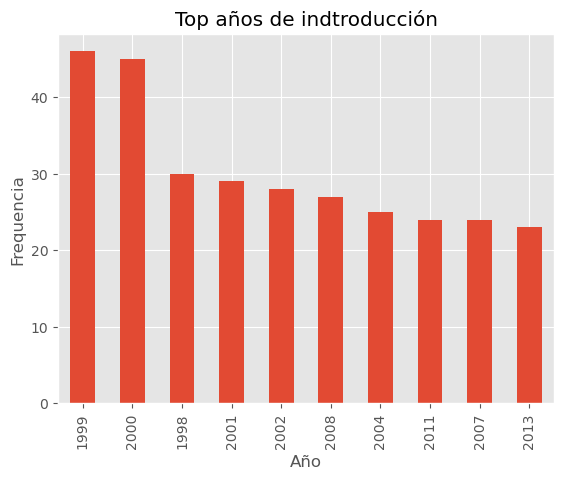

In [28]:
ax = df_resumed["Year_Introduced"].value_counts().head(10).plot(kind="bar", title = "Top años de indtroducción")

ax.set_xlabel("Año")
ax.set_ylabel("Frequencia")
ax

<Axes: title={'center': 'SPEED MPH'}, ylabel='Frequency'>

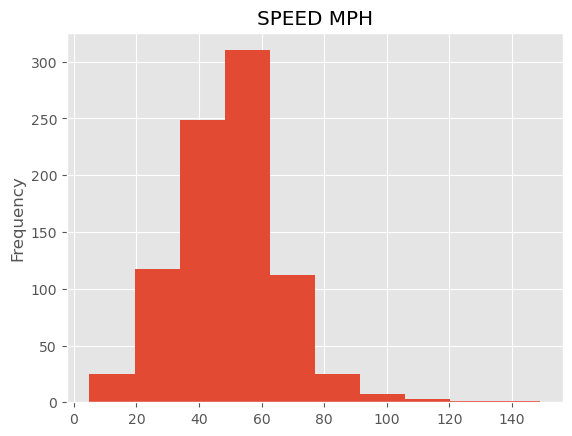

In [70]:
df_resumed["Speed_mph"].plot(kind="hist", #bins = 8, 
                             title = "SPEED MPH",
                             linewidth= 0.5)

<Axes: title={'center': 'SPEED MPH'}, ylabel='Density'>

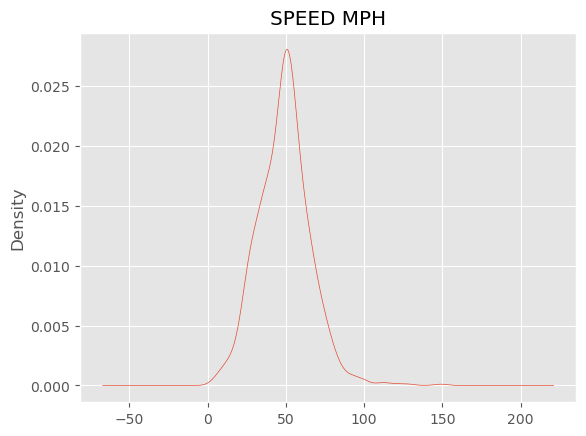

In [72]:
# KDE FOR KERNEL DENSITY

df_resumed["Speed_mph"].plot(kind="kde",
                             title = "SPEED MPH",
                             linewidth= 0.5)

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

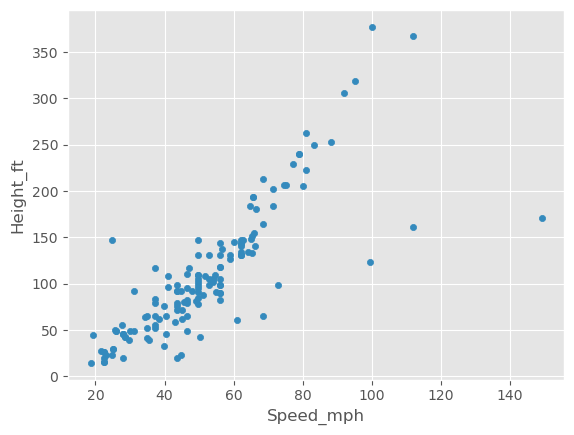

In [74]:
df_resumed.plot(kind="scatter",
                x = "Speed_mph",
                y = "Height_ft")

In [82]:
df_resumed.columns


Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Opening_Date', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

# SEABORN

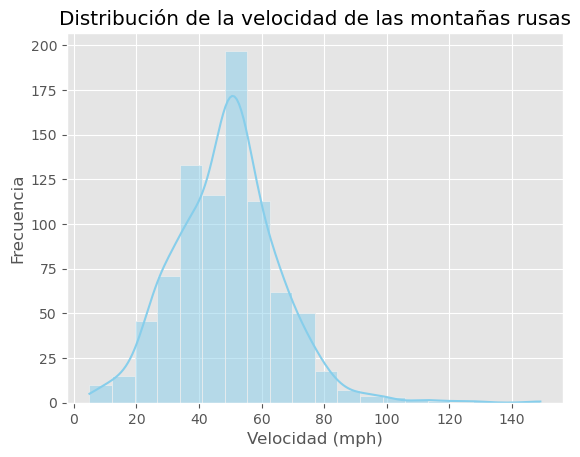

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_resumed, x='Speed_mph', bins=20, kde=True, color='skyblue')
plt.title('Distribución de la velocidad de las montañas rusas')
plt.xlabel('Velocidad (mph)')
plt.ylabel('Frecuencia')
plt.show()


<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

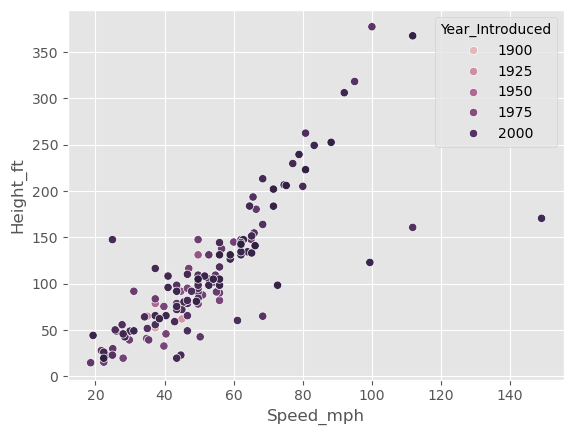

In [103]:
sns.scatterplot(
    x = "Speed_mph",
    y = "Height_ft",
    hue = "Year_Introduced",
    data = df_resumed
    #palette = "pastel"
)


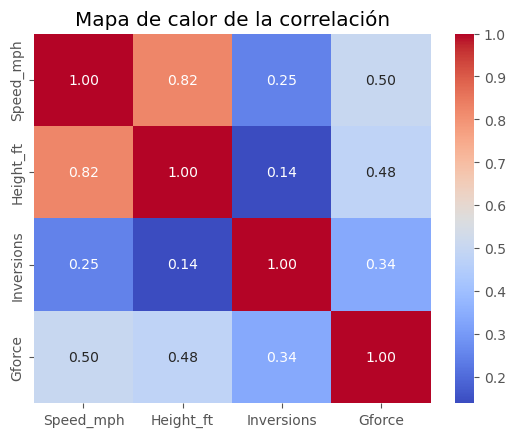

In [94]:
corr = df_resumed[['Speed_mph', 'Height_ft', 'Inversions', 'Gforce']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de la correlación')
plt.show()


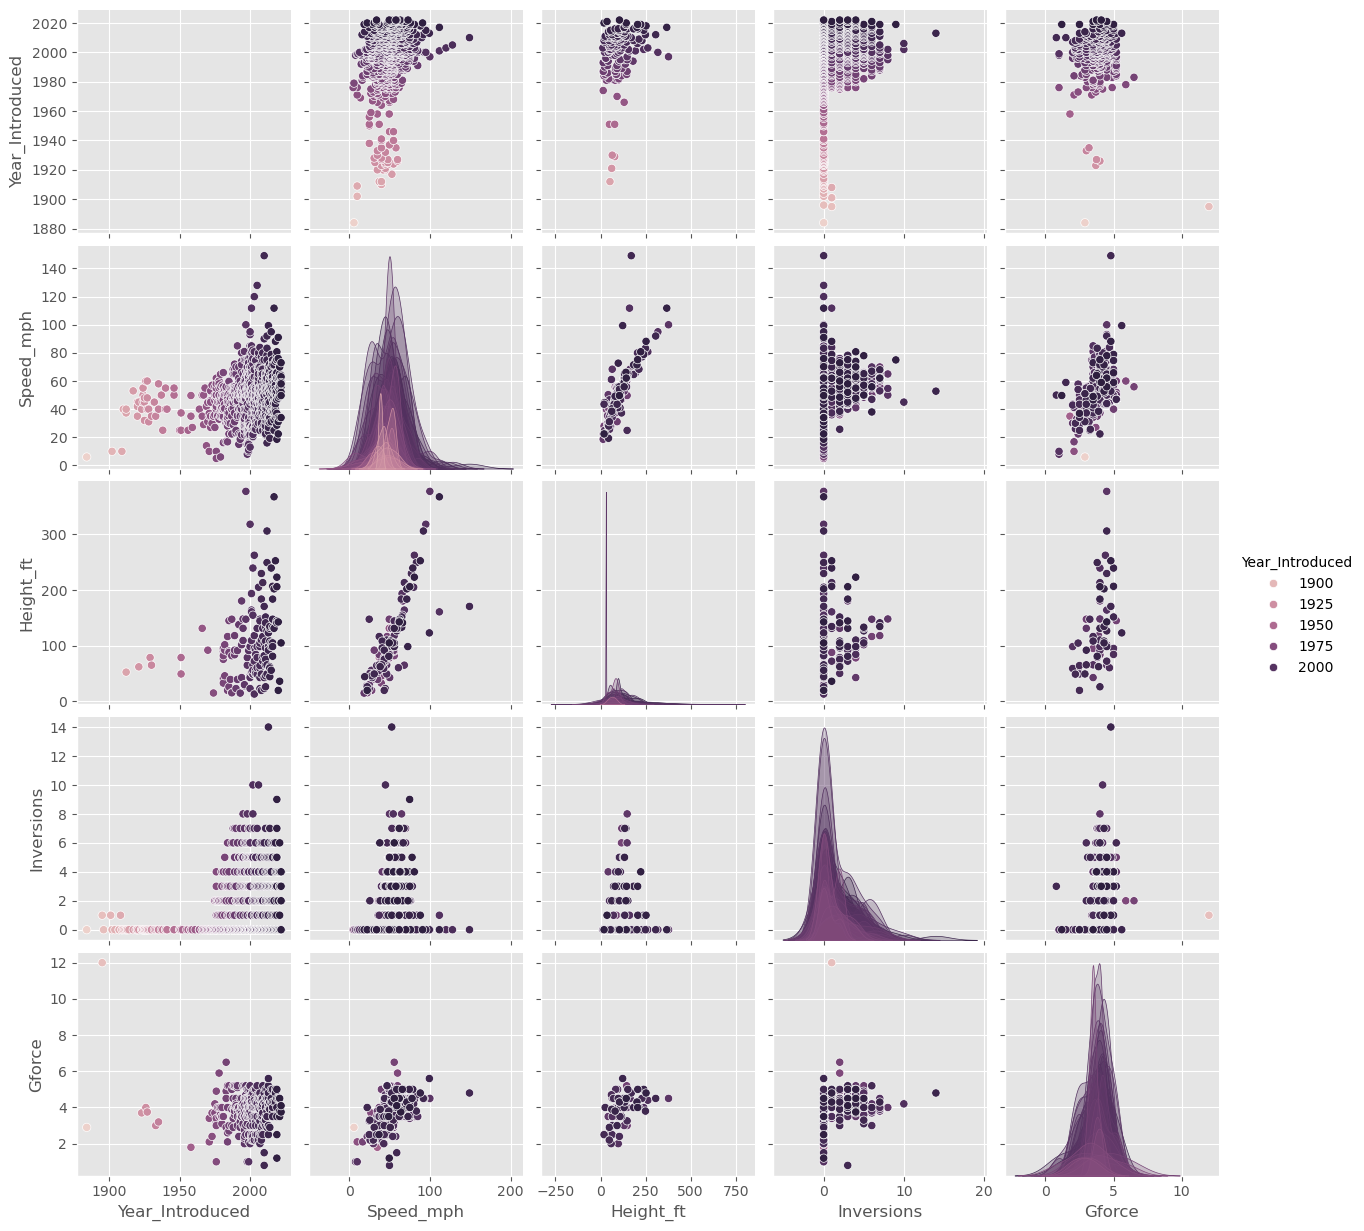

In [115]:
sns.pairplot(df_resumed,
             vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
            hue = ("Year_Introduced"))
            #hue='Type_Main')            
plt.show()

In [117]:
df_corr = df_resumed[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

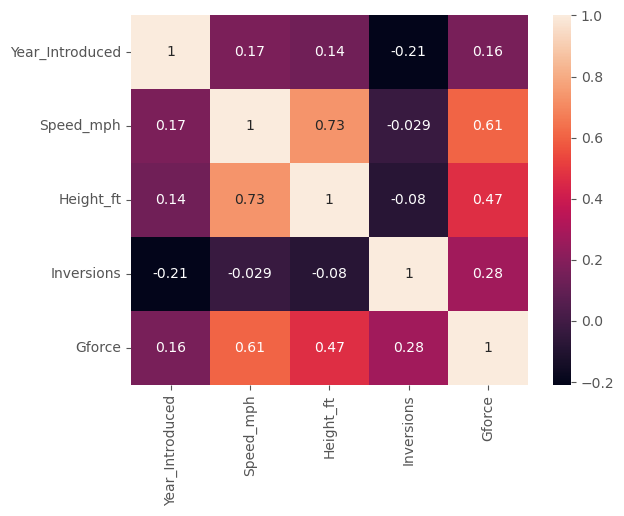

In [119]:
sns.heatmap(df_corr, annot=True)